In [345]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pymorphy2
import matplotlib.pyplot as plt
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("stopwords")
import string

from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\spant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [346]:
russian_texts = [
    """Воспоминаньями смущенный,
Исполнен сладкою тоской,
Сады прекрасные, под сумрак ваш священный
Вхожу с поникшею главой.
Так отрок библии, безумный расточитель,
До капли истощив раскаянья фиал,
Увидев наконец родимую обитель,
Главой поник и зарыдал.
В пылу восторгов скоротечных,
В бесплодном вихре суеты,
О, много расточил сокровищ я сердечных
За недоступные мечты,
И долго я блуждал, и часто, утомленный,
Раскаяньем горя, предчувствуя беды,
Я думал о тебе, предел благословенный,
Воображал сии сады.
Воображаю день счастливый,
Когда средь вас возник лицей,
И слышу наших игр я снова шум игривый
И вижу вновь семью друзей.
Вновь нежным отроком, то пылким, то ленивым,
Мечтанья смутные в груди моей тая,
Скитаясь по лугам, по рощам молчаливым,
Поэтом забываюсь я.
И въявь я вижу пред собою
Дней прошлых гордые следы.
Еще исполнены великою женою,
Ее любимые сады
Стоят населены чертогами, вратами,
Столпами, башнями, кумирами богов
И славой мраморной, и медными хвалами
Екатерининских орлов.
Садятся призраки героев
У посвященных им столпов,
Глядите: вот герой, стеснитель ратных строев,
Перун кагульских берегов.
Вот, вот могучий вождь полунощного флага,
Пред кем морей пожар и плавал и летал.
Вот верный брат его, герой Архипелага,
Вот наваринский Ганнибал.
Среди святых воспоминаний
Я с детских лет здесь возрастал,
А глухо между тем поток народной брани
Уж бесновался и роптал.
Отчизну обняла кровавая забота,
Россия двинулась, и мимо нас летят
И тучи конные, брадатая пехота,
И пушек светлый ряд.
На юных ратников завистливо взирали,
Ловили с жадностью мы брани дальный звук,
И, негодуя, мы и детство проклинали,
И узы строгие наук.
И многих не пришло. При звуке песней новых
Почили славные в полях Бородина,
На Кульмских высотах, в лесах Литвы суровых,
Вблизи Монмартра.""", #1
 
"""Любви, надежды, тихой славы
Недолго нежил нас обман,
Исчезли юные забавы,
Как сон, как утренний туман;
Но в нас горит еще желанье,
Под гнетом власти роковой
Нетерпеливою душой
Отчизны внемлем призыванье.
Мы ждем с томленьем упованья
Минуты вольности святой,
Как ждет любовник молодой
Минуты верного свиданья.
Пока свободою горим,
Пока сердца для чести живы,
Мой друг, отчизне посвятим
Души прекрасные порывы!
Товарищ, верь: взойдет она,
Звезда пленительного счастья,
Россия вспрянет ото сна,
И на обломках самовластья
Напишут наши имена!""", #2

"""Погасло дневное светило;
На море синее вечерний пал туман.
Шуми, шуми, послушное ветрило,
Волнуйся подо мной, угрюмый океан.
Я вижу берег отдаленный,
Земли полуденной волшебные края;
С волненьем и тоской туда стремлюся я,
Воспоминаньем упоенный…
И чувствую: в очах родились слезы вновь;
Душа кипит и замирает;
Мечта знакомая вокруг меня летает;
Я вспомнил прежних лет безумную любовь,
И всё, чем я страдал, и всё, что сердцу мило,
Желаний и надежд томительный обман…
Шуми, шуми послушное ветрило,
Волнуйся подо мной, угрюмый океан.
Лети, корабль, неси меня к пределам дальным
По грозной прихоти обманчивых морей,
Но только не к брегам печальным
Туманной родины моей,
Страны, где пламенем страстей
Впервые чувства разгорались,
Где музы нежные мне тайно улыбались,
Где рано в бурях отцвела
Моя потерянная младость,
Где легкокрылая мне изменила радость
И сердце хладное страданью предала.
Искатель новых впечатлений,
Я вас бежал, отечески края;
Я вас бежал, питомцы наслаждений,
Минутной младости минутные друзья;
И вы, наперсницы порочных заблуждений,
Которым без любви я жертвовал собой,
Покоем, славою, свободой и душой,
И вы забыты мной, изменницы младые,
Подруги тайные моей весны златыя,
И вы забыты мной… Но прежних сердца ран,
Глубоких ран любви, ничто не излечило…
Шуми, шуми послушное ветрило,
Волнуйся подо мной, угрюмый океан…""" , #3

"""Прощай, письмо любви! прощай: она велела.
Как долго медлил я! как долго не хотела
Рука предать огню все радости мои!..
Но полно, час настал. Гори, письмо любви.
Готов я; ничему душа моя не внемлет.
Уж пламя жадное листы твои приемлет…
Минуту!.. вспыхнули! пылают — легкий дым
Виясь, теряется с молением моим.
Уж перстня верного утратя впечатленье,
Растопленный сургуч кипит… О провиденье!
Свершилось! Темные свернулися листы;
На легком пепле их заветные черты
Белеют… Грудь моя стеснилась. Пепел милый,
Отрада бедная в судьбе моей унылой,
Останься век со мной на горестной груди…""", #4

"""Во глубине сибирских руд
Храните гордое терпенье,
Не пропадет ваш скорбный труд
И дум высокое стремленье.
Несчастью верная сестра,
Надежда в мрачном подземелье
Разбудит бодрость и веселье,
Придет желанная пора:
Любовь и дружество до вас
Дойдут сквозь мрачные затворы,
Как в ваши каторжные норы
Доходит мой свободный глас.
Оковы тяжкие падут,
Темницы рухнут — и свобода
Вас примет радостно у входа,
И братья меч вам отдадут.""", #5

"""…Вновь я посетил
Тот уголок земли, где я провел
Изгнанником два года незаметных.
Уж десять лет ушло с тех пор — и много
Переменилось в жизни для меня,
И сам, покорный общему закону,
Переменился я — но здесь опять
Минувшее меня объемлет живо,
И, кажется, вечор еще бродил
Я в этих рощах.
Вот опальный домик,
Где жил я с бедной нянею моей.
Уже старушки нет — уж за стеною
Не слышу я шагов ее тяжелых,
Ни кропотливого ее дозора.
Вот холм лесистый, над которым часто
Я сиживал недвижим — и глядел
На озеро, воспоминая с грустью
Иные берега, иные волны…
Меж нив златых и пажитей зеленых
Оно синея стелется широко;
Через его неведомые воды
Плывет рыбак и тянет за собою
Убогий невод. По брегам отлогим
Рассеяны деревни — там за ними
Скривилась мельница, насилу крылья
Ворочая при ветре…
На границе
Владений дедовских, на месте том,
Где в гору подымается дорога,
Изрытая дождями, три сосны
Стоят — одна поодаль, две другие
Друг к дружке близко, — здесь, когда их мимо
Я проезжал верхом при свете лунном,
Знакомым шумом шорох их вершин
Меня приветствовал. По той дороге
Теперь поехал я и пред собою
Увидел их опять. Они всё те же,
Все тот же их знакомый уху шорох —
Но около корней их устарелых
(Где некогда все было пусто, голо)
Теперь младая роща разрослась,
Зеленая семья, кусты теснятся
Под сенью их как дети. А вдали
Стоит один угрюмый их товарищ,
Как старый холостяк, и вкруг него
По-прежнему все пусто.Здравствуй, племя
Младое, незнакомое! не я
Увижу твой могучий поздний возраст,
Когда перерастешь моих знакомцев
И старую главу их заслонишь
От глаз прохожего. Но пусть мой внук
Услышит ваш приветный шум, когда,
С приятельской беседы возвращаясь,
Веселых и приятных мыслей полон,
Пройдет он мимо вас во мраке ночи
И обо мне вспомянет.""" #6
    
]

In [347]:
def lexical_diversity(text):
    # Удалить знаки препинания из текста
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.lower().split()
    return len(set(words)) / len(words)

In [348]:
def count_pos(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)
    return pos_counts

In [349]:
# Функция для нахождения самых встречающихся слов
def most_common_words(text, n=5):
    # Разбить текст на токены
    tokens = nltk.word_tokenize(text)
    
    # Удалить знаки препинания из токенов
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Вычислить частотное распределение слов
    freq_dist = nltk.FreqDist(tokens)
    
    # Найти самые встречающиеся слова
    common_words = freq_dist.most_common(n)
    
    return common_words

In [350]:
# Функция для стемминга
def stemming_russian(text):
    stemmer = SnowballStemmer(language='russian')
    tokens = nltk.word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens]
    return stemmed

In [351]:
# Морфологический анализ (пример на русском)
morph = pymorphy2.MorphAnalyzer()
parsed_word = morph.parse('стали')[0]

In [352]:
prev_pos_counts = None
# Пройдемся по каждому тексту в списке
for i, russian_text in enumerate(russian_texts, 1):
    print(f"Анализ текста {i}:\n")
    
    lex_diversity = lexical_diversity(russian_text)
    print("Лексическое разнообразие:", lex_diversity)
    
    # Анализ частей речи
    pos_counts = count_pos(russian_text)
    if prev_pos_counts:
        print("Количество частей речи:")
        for pos, count in pos_counts.items():
            change = count - prev_pos_counts.get(pos, 0)
            print(f"    {pos}: {count} (изменение: {change})")
    else:
        print("Количество частей речи:")
        for pos, count in pos_counts.items():
            print(f"    {pos}: {count}")



    common_words = most_common_words(russian_text)
    print("Самые встречающиеся слова:", common_words)
    
    stemmed = stemming_russian(russian_text)
    print("Стемминг (русский):", stemmed)
    
    print("\n" + "="*60 + "\n")

    prev_pos_counts = pos_counts


Анализ текста 1:

Лексическое разнообразие: 0.8283582089552238
Количество частей речи:
    NN: 6
    ,: 52
    NNP: 238
    .: 14
    VB: 12
    JJ: 12
    :: 1
Самые встречающиеся слова: [('И', 10), ('и', 8), ('я', 4), ('с', 3), ('в', 3)]
Стемминг (русский): ['воспоминан', 'смущен', ',', 'исполн', 'сладк', 'тоск', ',', 'сад', 'прекрасн', ',', 'под', 'сумрак', 'ваш', 'священ', 'вхож', 'с', 'поникш', 'глав', '.', 'так', 'отрок', 'библ', ',', 'безумн', 'расточител', ',', 'до', 'капл', 'истощ', 'раскаян', 'фиа', ',', 'увид', 'наконец', 'родим', 'обител', ',', 'глав', 'поник', 'и', 'зарыда', '.', 'в', 'пыл', 'восторг', 'скоротечн', ',', 'в', 'бесплодн', 'вихр', 'сует', ',', 'о', ',', 'мног', 'расточ', 'сокровищ', 'я', 'сердечн', 'за', 'недоступн', 'мечт', ',', 'и', 'долг', 'я', 'блужда', ',', 'и', 'част', ',', 'утомлен', ',', 'раскаян', 'гор', ',', 'предчувству', 'бед', ',', 'я', 'дума', 'о', 'теб', ',', 'предел', 'благословен', ',', 'вообража', 'си', 'сад', '.', 'вообража', 'ден', 'счастл

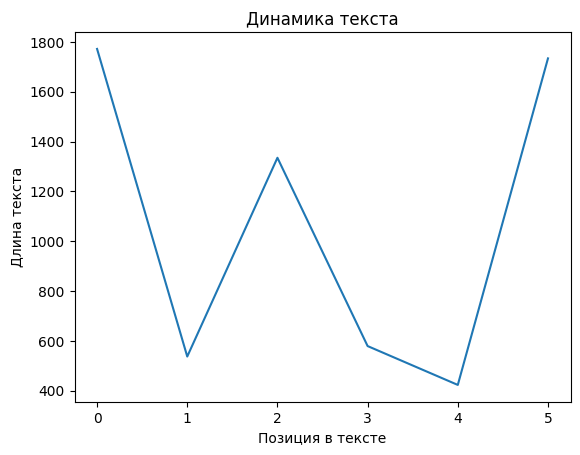

In [353]:
russian_text_lengths = [len(russian_text) for russian_text in russian_texts]

plt.plot(russian_text_lengths)
plt.xlabel("Позиция в тексте")
plt.ylabel("Длина текста")
plt.title("Динамика текста")
plt.show()